# Survival Function of Different Groups

To gain insights into how various patient features impact 30-day ICU survival probability, we plotted Kaplan-Meier survival curves for patients grouped by specific characteristics. These characteristics include:

Use of Mechanical Ventilation: Patients were categorized based on whether they required mechanical ventilation during their ICU stay.


Comorbidities of Diabetes: We examined the survival probabilities of patients with and without a diabetes diagnosis to assess the influence of this comorbidity.


Body Mass Index (BMI) Greater Than 35: Patients were grouped according to their BMI, focusing on those with a BMI over 35 to evaluate the effect of obesity on survival outcomes.


Gender: Survival curves were generated separately for male and female patients to explore potential gender-related differences in survival rates.


Ethnicity: We stratified patients by ethnicity to identify any disparities in survival probabilities among different ethnic groups.


By analyzing these Kaplan-Meier survival curves, we aimed to understand the impact of these features on patient survival within 30 days 
of ICU admission. This analysis helps identify key factors that may influence patient outcomes and can inform clinical decision-making and resource allocation in critical care settings.








In [ ]:
library(asaur)
library(survival)
library(ggplot2)
library(reshape2)
library(patchwork)
library(survminer)

In [8]:
data=read.csv("all_patients_data_cleaned.csv")

data <- data[, !names(data) %in% c("SUBJECT_ID","HADM_ID","ICUSTAY_ID"	,"LOS_HOSPITAL","HOSPITAL_EXPIRE_FLAG")]

data$LOS_ICU[data$LOS_ICU > 30] <- 30  

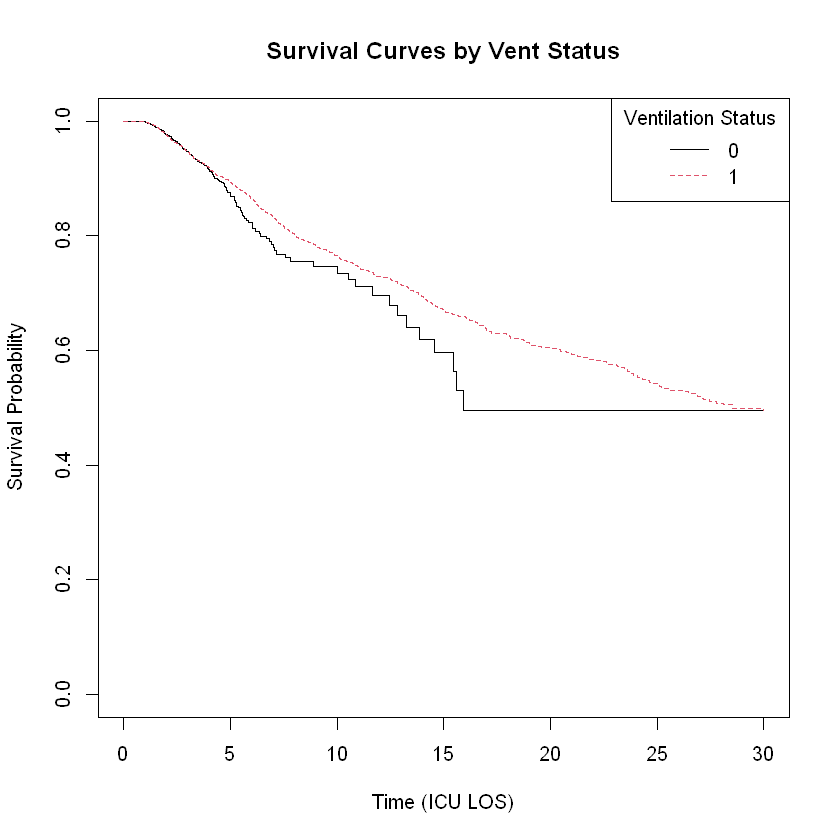

In [18]:
survfunc=survfit(formula = Surv(LOS_ICU,EXPIRE_FLAG_30D) ~ strata(data$MECHANICAL_VENTILATION), data= data,ctype=1,conf.type="plain")
plot(survfunc, 
     col = c(1, 2),           
     lty = 1:2,              
     xlab = "Time (ICU LOS)",  
     ylab = "Survival Probability", 
     main = "Survival Curves by Vent Status")

legend("topright", 
       legend = levels(as.factor(data$MECHANICAL_VENTILATION)), 
       col = c(1, 2), 
       lty = 1:2, 
       title = "Ventilation Status")


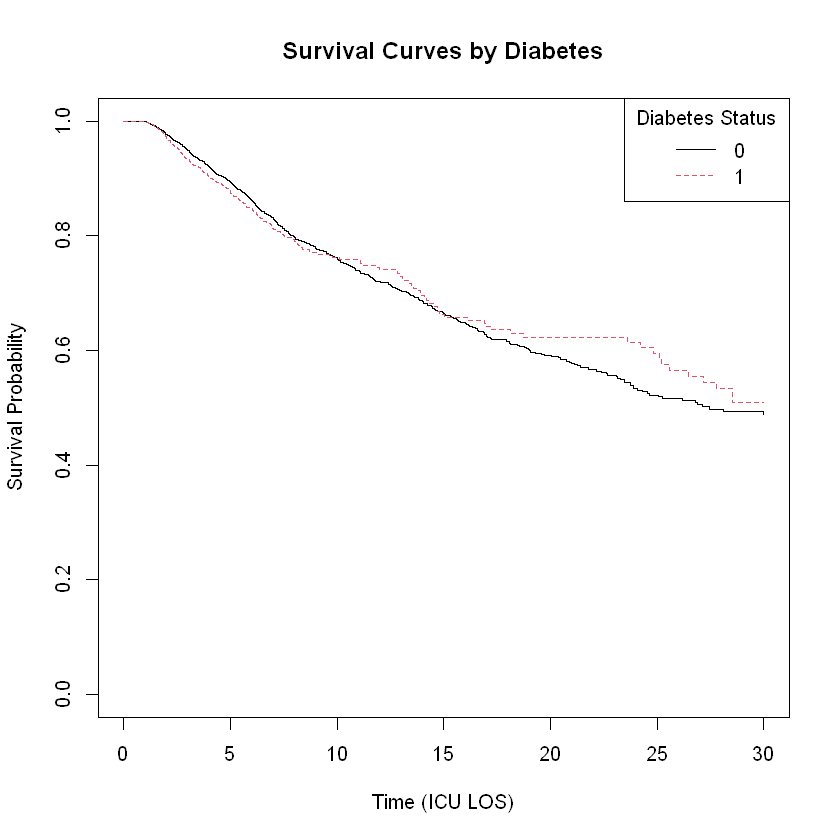

In [24]:
survfunc=survfit(formula = Surv(LOS_ICU,EXPIRE_FLAG_30D) ~ strata(data$DIABETES), data= data,ctype=1,conf.type="plain")
plot(survfunc, 
     col = c(1, 2),           
     lty = 1:2,              
     xlab = "Time (ICU LOS)",  
     ylab = "Survival Probability", 
     main = "Survival Curves by Diabetes") 

legend("topright", 
       legend = levels(as.factor(data$DIABETES)), 
       col = c(1, 2), 
       lty = 1:2, 
       title = "Diabetes Status")


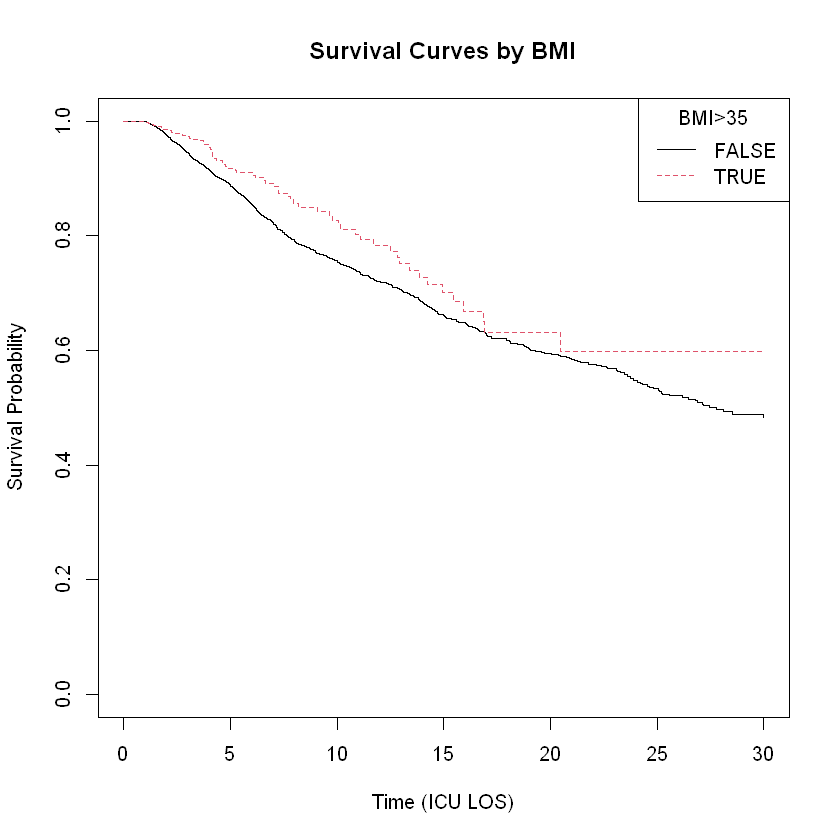

In [38]:
survfunc=survfit(formula = Surv(LOS_ICU,EXPIRE_FLAG_30D) ~ strata(data$BMI>35), data= data,ctype=1,conf.type="plain")
plot(survfunc, 
     col = c(1, 2),           
     lty = 1:2,              
     xlab = "Time (ICU LOS)",  
     ylab = "Survival Probability", 
     main = "Survival Curves by BMI") 

legend("topright", 
       legend = levels(as.factor(data$BMI>35)), 
       col = c(1, 2), 
       lty = 1:2, 
       title = "BMI>35")


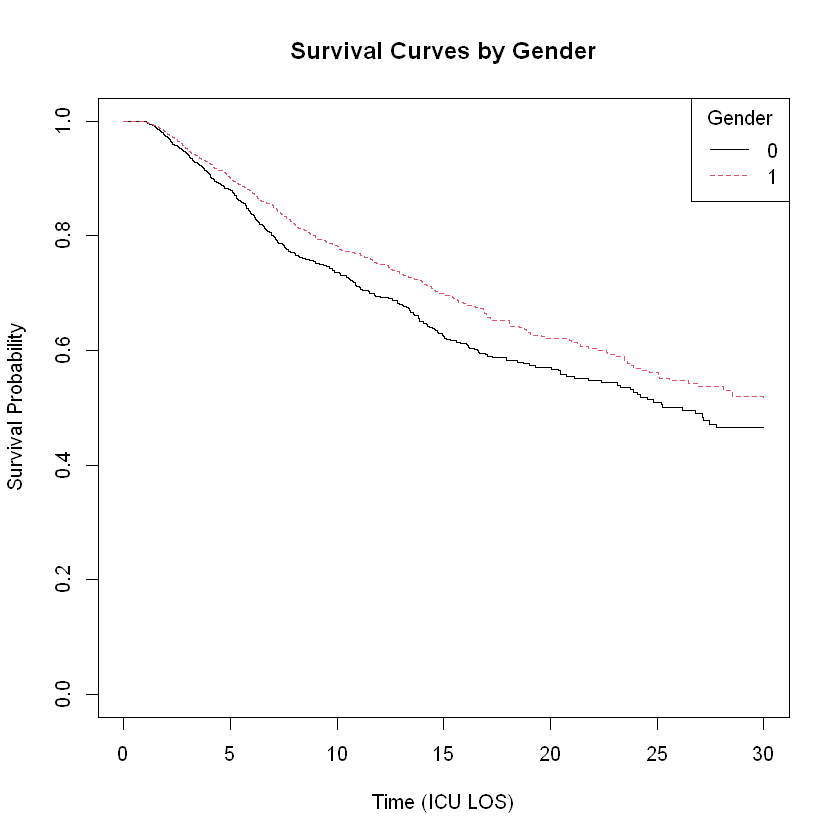

In [31]:
survfunc=survfit(formula = Surv(LOS_ICU,EXPIRE_FLAG_30D) ~ strata(data$GENDER), data= data,ctype=1,conf.type="plain")
plot(survfunc, 
     col = c(1, 2),           
     lty = 1:2,              
     xlab = "Time (ICU LOS)",  
     ylab = "Survival Probability", 
     main = "Survival Curves by Gender") 

legend("topright", 
       legend = levels(as.factor(data$GENDER)), 
       col = c(1, 2), 
       lty = 1:2, 
       title = "Gender")


Warning message:
"package 'RColorBrewer' was built under R version 4.0.5"


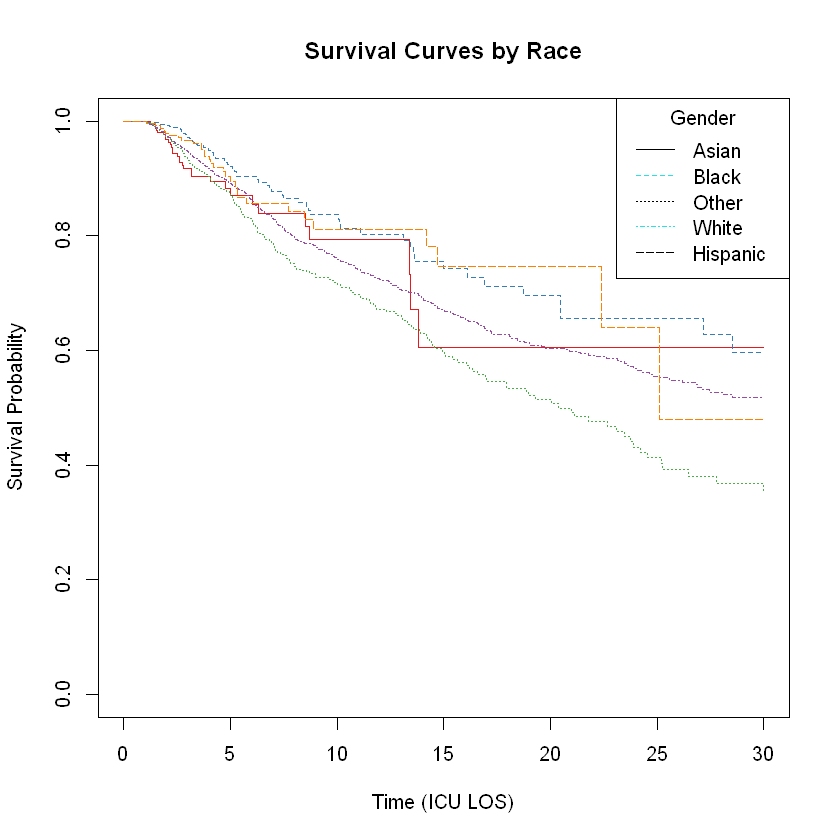

In [45]:
ethnicity_columns <- c("ETHNICITY_Black", "ETHNICITY_White", "ETHNICITY_Other","ETHNICITY_Hispanic")
library(RColorBrewer)

# Select a palette with 5 colors
colors <- brewer.pal(5, "Set1")

# Initialize the 'RACE' column
data$RACE <- NA

# Assign race labels based on ethnicity columns
data$RACE[data$ETHNICITY_Black == 1] <- "Black"
data$RACE[data$ETHNICITY_White == 1] <- "White"
data$RACE[data$ETHNICITY_Other == 1] <- "Other"
data$RACE[data$ETHNICITY_Hispanic == 1] <- "Hispanic"


# Assign 'Asian' where all ethnicity columns are 0
data$RACE[
    data$ETHNICITY_Black == 0 &
    data$ETHNICITY_White == 0 &
    data$ETHNICITY_Other == 0 &
    data$ETHNICITY_Hispanic ==0
] <- "Asian"

# Convert 'RACE' to a factor (optional)
data$RACE <- factor(data$RACE, levels = c("Asian", "Black", "Other", "White","Hispanic"))

survfunc=survfit(formula = Surv(LOS_ICU,EXPIRE_FLAG_30D) ~ strata(data$RACE), data= data,ctype=1,conf.type="plain")
plot(survfunc, 
     col = colors,           
     lty = 1:5,              
     xlab = "Time (ICU LOS)",  
     ylab = "Survival Probability", 
     main = "Survival Curves by Race") 

legend("topright", 
       legend = levels(as.factor(data$RACE)), 
       col = c(1, 5), 
       lty = 1:5, 
       title = "Gender")


The survival analysis based on Kaplan-Meier curves for different ICU patient characteristics provided insights into the 30-day ICU survival probabilities:

Mechanical Ventilation: Patients on mechanical ventilation exhibited significantly higher survival probabilities than those not on ventilation, reflecting positive effetc of this intervention on ICU patients. However, this group’s curve declines more sharply in later stage of ICU stays, and 30 Day mortality risk is almost the same for two groups.

Diabetes Comorbidity: The survival curve for patients with diabetes shows a moderate increase in survival probability compared to non-diabetic patients, particularly noticeable beyond the initial ICU days. Patients with diabetes show an increased survival probability within the ICU setting also aligns with what some studies describe as an "obesity paradox" or "diabetes paradox." This paradox suggests that, under certain conditions—particularly in intensive care—patients with diabetes may have relatively favorable short-term survival rates

BMI > 35: Thank you for pointing that out. If patients with a BMI over 35 indeed show an increased survival probability rather than a reduced one, it suggests that, contrary to typical expectations, higher BMI in this ICU cohort might be associated with a survival advantage, at least within the 30-day timeframe.


Gender: There is no significant difference between male and female survival curves in this data. This suggests gender may not be a primary determinant of ICU survival within 30 days in this cohort.

Ethnicity: Variations across ethnic groups were observed, with some groups displaying higher early survival probabilities than others. However, the analysis indicates a need for more nuanced examination, as these differences may reflect underlying health disparities or access to care factors.

